In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#################
# configuration #
#################

# sample size per gender
SAMPLE_SIZE = 2500

# number of steps from original distribution to corrected distribution
STEP_SIZE = 5

# number of repetitions per configuration
REPEAT = 100

# valid annotation values
valid_height = set([i for i in range(1,401)])
valid_frames = set([i for i in range(1,401)])

# bin size for height and speed
bin_size = 5

max_dist = 10.0
bin_size_dist = 1000

In [3]:
#############################
# csv loading and filtering #
#############################

# load annotations
df = pd.read_csv('OUMVLP_annotations.csv')

# discretize annotation values
df['height'] = (df['height']//bin_size)*bin_size
df['frames'] = (df['frames']//bin_size)*bin_size

# get subjects with valid annotations only
df = df.loc[df['height'].isin(valid_height) & df['frames'].isin(valid_frames) & (df['test'] == True)]

# reset table indices
df = df.reset_index(drop=True)

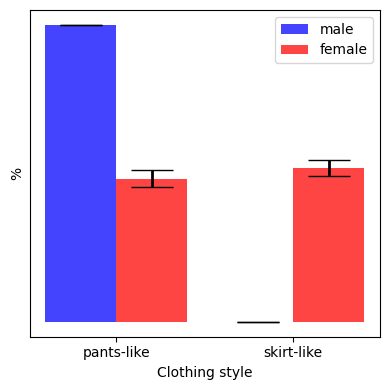

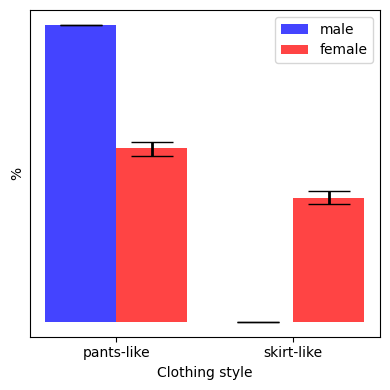

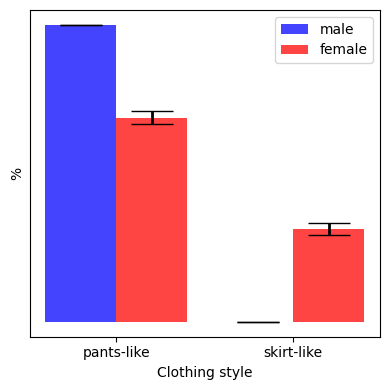

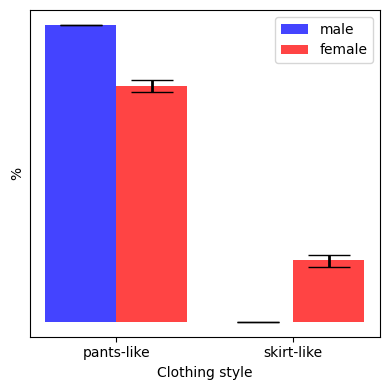

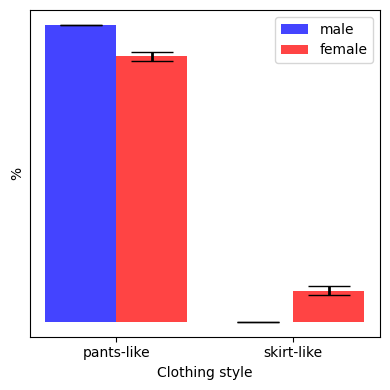

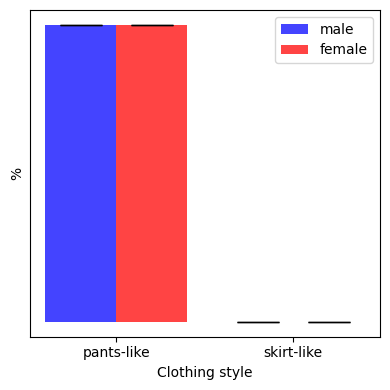

In [4]:
_p_height = p_height = 0
_p_frame = p_frame = 0
for _p_dress in range(0, STEP_SIZE+1):
    p_dress = _p_dress/STEP_SIZE

    dress_females = {x: [0]*REPEAT for x in range(2)}

    for r in range(REPEAT):

        with open('0_samples/{:03d}_{:03d}_{:03d}_{:03d}.txt'.format(_p_height*100//STEP_SIZE, _p_frame*100//STEP_SIZE, _p_dress*100//STEP_SIZE, r), 'r') as fp:
            lines = fp.read().splitlines()
        males = [int(x) for x in lines[0].split()]
        females = [int(x) for x in lines[1].split()]

        df2 = pd.DataFrame({'ID': females})
        df3 = df.assign(idx=df.index).merge(df2, on='ID')
        values, counts = np.unique(df3['dress'], return_counts=True)

        for v, c in zip(values, counts):
            dress_females[v][r] = c/SAMPLE_SIZE

    vals = np.vstack([dress_females[0], dress_females[1]])
    mini=0
    maxi=0
    for i in range(1, REPEAT):
        if vals[0,i]-vals[1,i] > vals[0,maxi]-vals[1,maxi]:
            maxi=i
        if vals[0,i]-vals[1,i] < vals[0,mini]-vals[1,mini]:
            mini=i
    
    fig, ax = plt.subplots(figsize=(4,4))

    x_labels = ['pants-like', 'skirt-like']

    vals*=100.0
    vals = np.asarray([vals[:,maxi:maxi+1].mean(axis=1), vals.mean(axis=1), vals[:,mini:mini+1].mean(axis=1)])

    x_axis = np.arange(len(x_labels))

    plt.bar(x_axis-0.2, [100, 0], width=0.4, label='male', color='#4444ff')
    plt.errorbar(x_axis-0.2, [100, 0], yerr=[[0,0], [0,0]], fmt='.k', markersize=0, capsize=15, elinewidth=2)
    plt.bar(x_axis+0.2, vals[1], width=0.4, label='female', color='#ff4444')
    plt.errorbar(x_axis+0.2, vals[1], yerr=[vals[1]-vals[0], vals[2]-vals[1]], fmt='.k', markersize=0, capsize=15, elinewidth=2)

    plt.xticks(x_axis, x_labels)
    plt.ylabel('%')
    plt.xlabel('Clothing style')
    plt.yticks([], labels="")

    plt.ylim([-5, 105])

    plt.legend()
    plt.tight_layout()
    plt.savefig('plots/dist_clothing_{:03d}.png'.format(_p_dress*100//STEP_SIZE))
    plt.show()

Average male height: 286.36018
Average female height: 267.81721999999996
Bhattacharyya distance: 0.3078376750571106


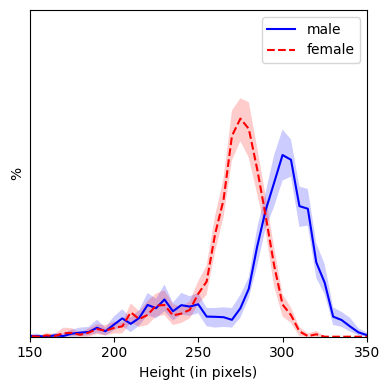

Average male height: 284.14613999999995
Average female height: 269.24835999999993
Bhattacharyya distance: 0.1709536761098714


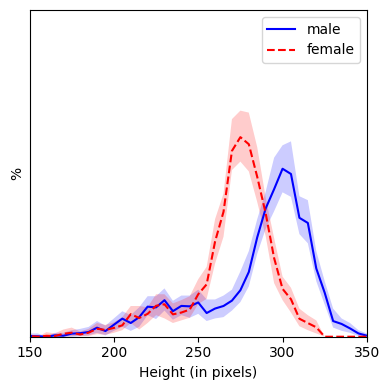

Average male height: 282.11671999999993
Average female height: 270.70876
Bhattacharyya distance: 0.09420199606226361


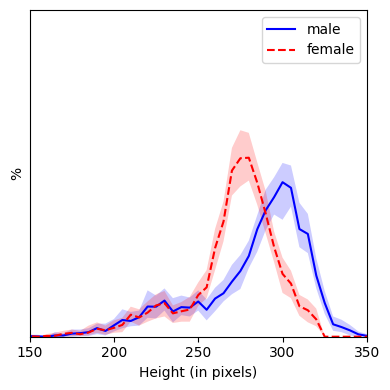

Average male height: 279.94662
Average female height: 272.31748
Bhattacharyya distance: 0.04486862906029257


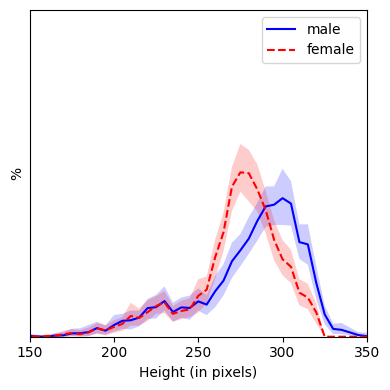

Average male height: 277.64452000000006
Average female height: 273.85176000000007
Bhattacharyya distance: 0.014331831693770981


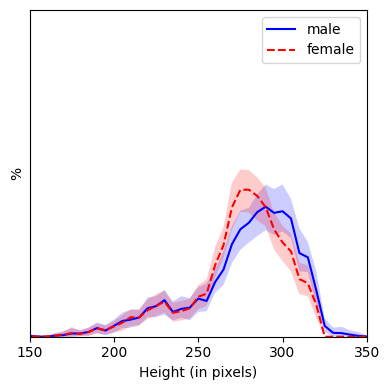

Average male height: 275.33182000000005
Average female height: 275.33182000000005
Bhattacharyya distance: -0.0


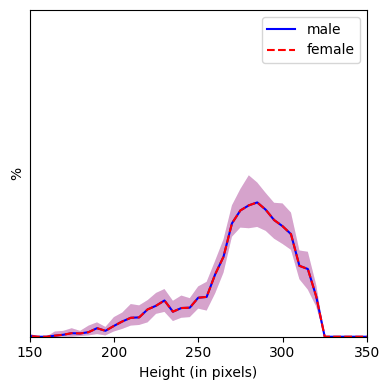

In [5]:
_p_frame = p_frame = 0
_p_dress = p_dress = 0
for _p_height in range(0, STEP_SIZE+1):
    p_height = _p_height/STEP_SIZE

    height_males = {x: [0]*REPEAT for x in range(0, 401, 5)}
    height_females = {x: [0]*REPEAT for x in range(0, 401, 5)}

    for r in range(REPEAT):

        with open('0_samples/{:03d}_{:03d}_{:03d}_{:03d}.txt'.format(_p_height*100//STEP_SIZE, _p_frame*100//STEP_SIZE, _p_dress*100//STEP_SIZE, r), 'r') as fp:
            lines = fp.read().splitlines()
        males = [int(x) for x in lines[0].split()]
        females = [int(x) for x in lines[1].split()]

        df2 = pd.DataFrame({'ID': males})
        df3 = df.assign(idx=df.index).merge(df2, on='ID')
        values, counts = np.unique(df3['height'], return_counts=True)
        for v, c in zip(values, counts):
            height_males[v][r] = c/SAMPLE_SIZE

        df2 = pd.DataFrame({'ID': females})
        df3 = df.assign(idx=df.index).merge(df2, on='ID')
        values, counts = np.unique(df3['height'], return_counts=True)
        for v, c in zip(values, counts):
            height_females[v][r] = c/SAMPLE_SIZE

    plt.figure(figsize=(4,4))
    
    x = height_males.keys()
    y = [np.mean(height_males[x]) for x in height_males.keys()]
    y_min = [np.min(height_males[x]) for x in height_males.keys()]
    y_max = [np.max(height_males[x]) for x in height_males.keys()]
    plt.fill_between(x, y_min, y_max, alpha=0.2, facecolor='#0000FF')
    plt.plot(x, y, '-b', label='male')
    print('Average male height:', sum([x_*y_ for x_, y_ in zip(x, y)]))
    yM = y
    
    x = height_females.keys()
    y = [np.mean(height_females[x]) for x in height_females.keys()]
    y_min = [np.min(height_females[x]) for x in height_females.keys()]
    y_max = [np.max(height_females[x]) for x in height_females.keys()]
    plt.fill_between(x, y_min, y_max, alpha=0.2, facecolor='#FF0000')
    plt.plot(x, y, '--r', label='female')
    print('Average female height:', sum([x_*y_ for x_, y_ in zip(x, y)]))
    yF = y
    Bd = -np.log(np.sum([np.sqrt(m*f) for m, f in zip(yM, yF)]))
    print('Bhattacharyya distance:', Bd)

    plt.xticks([150,200,250,300,350])
    plt.yticks([], labels="")
    plt.xlim([150, 350])
    plt.ylim([0.0, 0.2])

    plt.xlabel("Height (in pixels)")
    plt.ylabel("%")

    plt.legend()
    plt.tight_layout()
    plt.savefig('plots/dist_height_{:03d}.png'.format(_p_height*100//STEP_SIZE))
    plt.show()


Average male speed: 76.00231999999997
Average female speed: 76.8757
Bhattacharyya distance: 0.004201375016432525


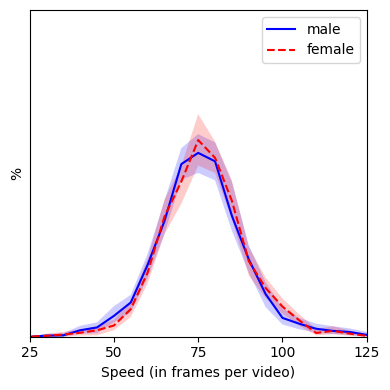

Average male speed: 75.99548000000001
Average female speed: 76.71392000000002
Bhattacharyya distance: 0.0027520780997325185


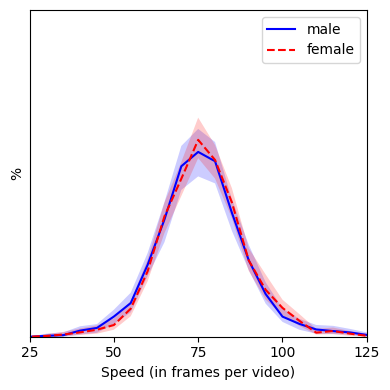

Average male speed: 76.13034
Average female speed: 76.61308000000001
Bhattacharyya distance: 0.0018882567864204807


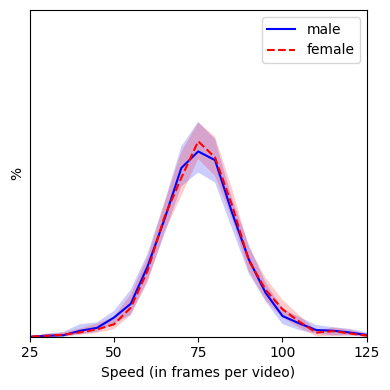

Average male speed: 76.19901999999998
Average female speed: 76.53554
Bhattacharyya distance: 0.0009724545558400307


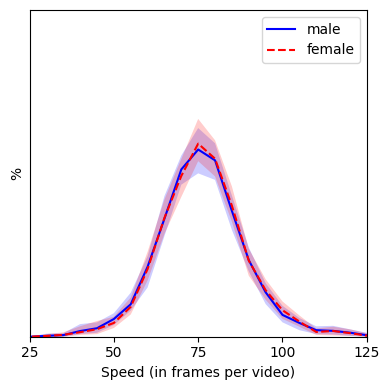

Average male speed: 76.27140000000001
Average female speed: 76.45514
Bhattacharyya distance: 0.00036697857347479116


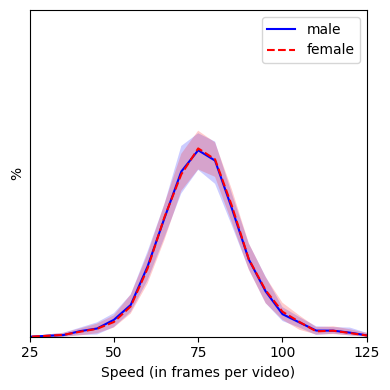

Average male speed: 76.33422000000002
Average female speed: 76.33422000000002
Bhattacharyya distance: -0.0


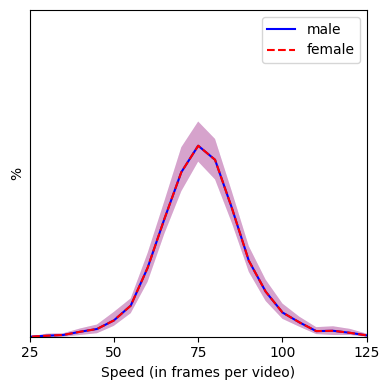

In [6]:
_p_height = p_height = 0
_p_dress = p_dress = 0
for _p_frame in range(0, STEP_SIZE+1):
    p_frame = _p_frame/STEP_SIZE

    frame_males = {x: [0]*REPEAT for x in range(0, 401, 5)}
    frame_females = {x: [0]*REPEAT for x in range(0, 401, 5)}

    for r in range(REPEAT):

        with open('0_samples/{:03d}_{:03d}_{:03d}_{:03d}.txt'.format(_p_height*100//STEP_SIZE, _p_frame*100//STEP_SIZE, _p_dress*100//STEP_SIZE, r), 'r') as fp:
            lines = fp.read().splitlines()
        males = [int(x) for x in lines[0].split()]
        females = [int(x) for x in lines[1].split()]

        df2 = pd.DataFrame({'ID': males})
        df3 = df.assign(idx=df.index).merge(df2, on='ID')
        values, counts = np.unique(df3['frames'], return_counts=True)
        for v, c in zip(values, counts):
            frame_males[v][r] = c/SAMPLE_SIZE

        df2 = pd.DataFrame({'ID': females})
        df3 = df.assign(idx=df.index).merge(df2, on='ID')
        values, counts = np.unique(df3['frames'], return_counts=True)
        for v, c in zip(values, counts):
            frame_females[v][r] = c/SAMPLE_SIZE

    plt.figure(figsize=(4,4))
 
    x = frame_males.keys()
    y = [np.mean(frame_males[x]) for x in frame_males.keys()]
    y_min = [np.min(frame_males[x]) for x in frame_males.keys()]
    y_max = [np.max(frame_males[x]) for x in frame_males.keys()]
    plt.fill_between(x, y_min, y_max, alpha=0.2, facecolor='#0000FF')
    plt.plot(x, y, '-b', label='male')
    print('Average male speed:', sum([x_*y_ for x_, y_ in zip(x, y)]))
    yM = y
    
    x = frame_females.keys()
    y = [np.mean(frame_females[x]) for x in frame_females.keys()]
    y_min = [np.min(frame_females[x]) for x in frame_females.keys()]
    y_max = [np.max(frame_females[x]) for x in frame_females.keys()]
    plt.fill_between(x, y_min, y_max, alpha=0.2, facecolor='#FF0000')
    plt.plot(x, y, '--r', label='female')
    print('Average female speed:', sum([x_*y_ for x_, y_ in zip(x, y)]))
    yF = y
    Bd = -np.log(np.sum([np.sqrt(m*f) for m, f in zip(yM, yF)]))
    print('Bhattacharyya distance:', Bd)

    plt.xticks([25,50,75,100,125])
    plt.yticks([], labels="")
    plt.xlim([25, 125])
    plt.ylim([0.0, 0.3])

    plt.xlabel("Speed (in frames per video)")
    plt.ylabel("%")

    plt.legend()
    plt.tight_layout()
    plt.savefig('plots/dist_speed_{:03d}.png'.format(_p_frame*100//STEP_SIZE))
    plt.show()


gaitset Ph 0.0 Ps 0.0 Pc 0.0 far 0.01 thr 3.24 fmr 1.93 0.87 0.454 fnmr 0.38 0.42 1.128


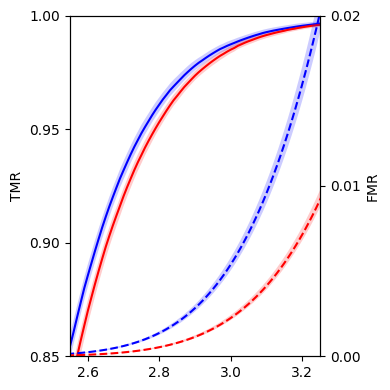

gaitpart Ph 0.0 Ps 0.0 Pc 0.0 far 0.01 thr 2.89 fmr 1.83 1.01 0.550 fnmr 0.36 0.33 0.892


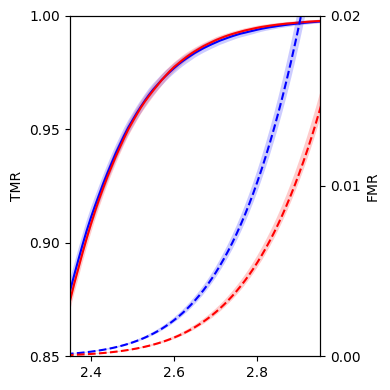

gaitgl Ph 0.0 Ps 0.0 Pc 0.0 far 0.01 thr 3.13 fmr 1.83 0.96 0.525 fnmr 0.33 0.37 1.101


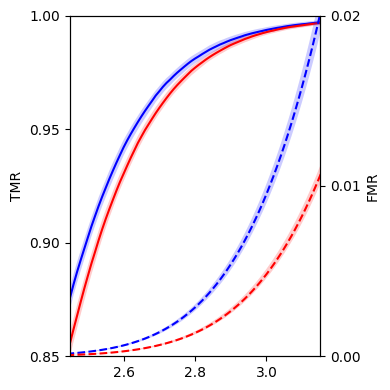

gaitset Ph 0.0 Ps 0.0 Pc 1.0 far 0.01 thr 3.21 fmr 1.68 1.11 0.663 fnmr 0.45 0.53 1.189


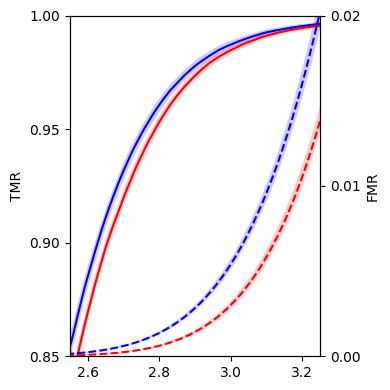

gaitpart Ph 0.0 Ps 0.0 Pc 1.0 far 0.01 thr 2.87 fmr 1.63 1.19 0.730 fnmr 0.42 0.37 0.874


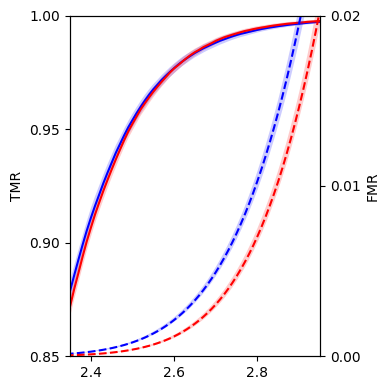

gaitgl Ph 0.0 Ps 0.0 Pc 1.0 far 0.01 thr 3.10 fmr 1.59 1.22 0.767 fnmr 0.40 0.45 1.143


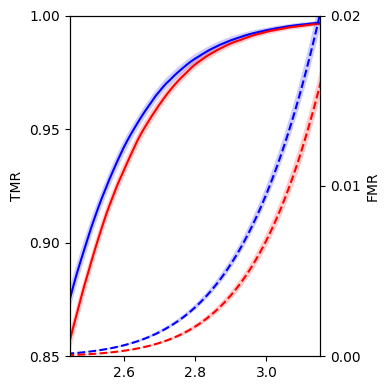

gaitset Ph 0.0 Ps 1.0 Pc 0.0 far 0.01 thr 3.24 fmr 1.94 0.87 0.451 fnmr 0.36 0.42 1.182


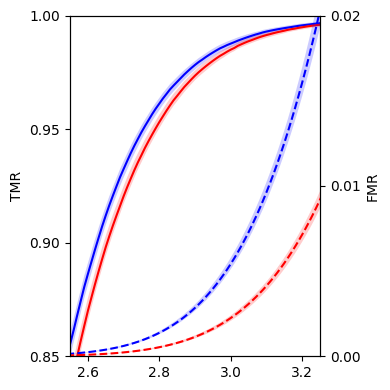

gaitpart Ph 0.0 Ps 1.0 Pc 0.0 far 0.01 thr 2.89 fmr 1.85 1.00 0.543 fnmr 0.35 0.32 0.930


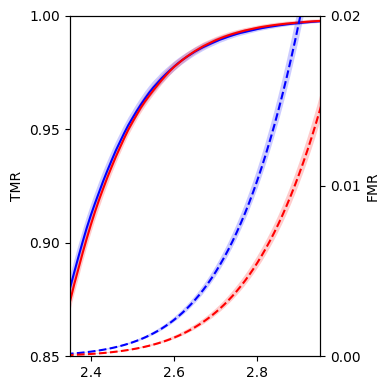

gaitgl Ph 0.0 Ps 1.0 Pc 0.0 far 0.01 thr 3.13 fmr 1.84 0.96 0.524 fnmr 0.31 0.37 1.163


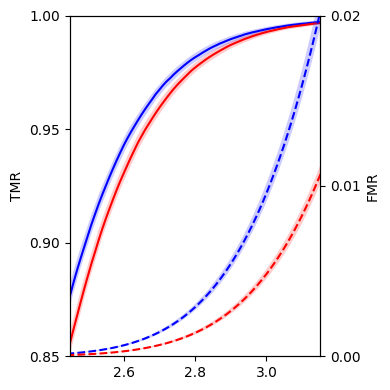

gaitset Ph 0.0 Ps 1.0 Pc 1.0 far 0.01 thr 3.21 fmr 1.70 1.10 0.649 fnmr 0.42 0.53 1.265


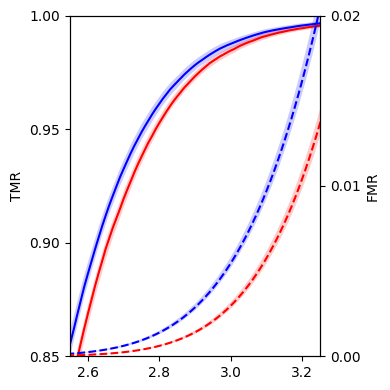

gaitpart Ph 0.0 Ps 1.0 Pc 1.0 far 0.01 thr 2.87 fmr 1.64 1.18 0.716 fnmr 0.40 0.37 0.940


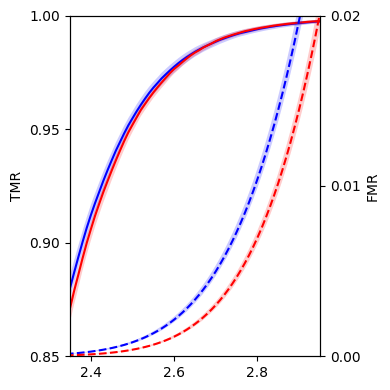

gaitgl Ph 0.0 Ps 1.0 Pc 1.0 far 0.01 thr 3.09 fmr 1.53 1.14 0.750 fnmr 0.39 0.48 1.221


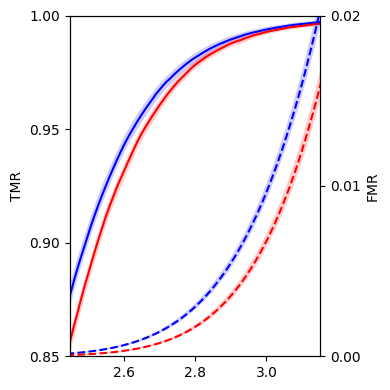

gaitset Ph 1.0 Ps 0.0 Pc 0.0 far 0.01 thr 3.26 fmr 1.87 0.87 0.464 fnmr 0.42 0.44 1.034


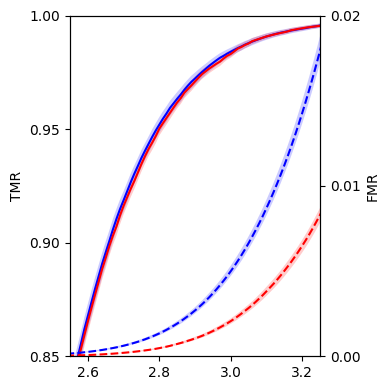

gaitpart Ph 1.0 Ps 0.0 Pc 0.0 far 0.01 thr 2.91 fmr 1.79 1.03 0.575 fnmr 0.41 0.34 0.835


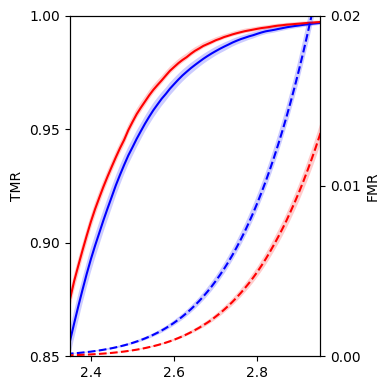

gaitgl Ph 1.0 Ps 0.0 Pc 0.0 far 0.01 thr 3.15 fmr 1.84 0.95 0.520 fnmr 0.39 0.37 0.941


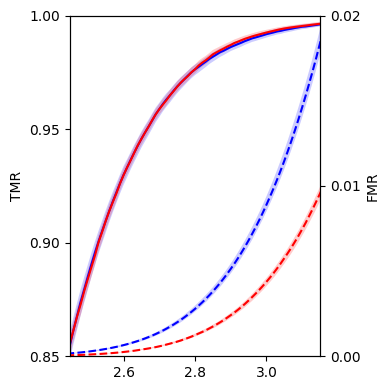

gaitset Ph 1.0 Ps 0.0 Pc 1.0 far 0.01 thr 3.22 fmr 1.57 1.12 0.710 fnmr 0.52 0.59 1.141


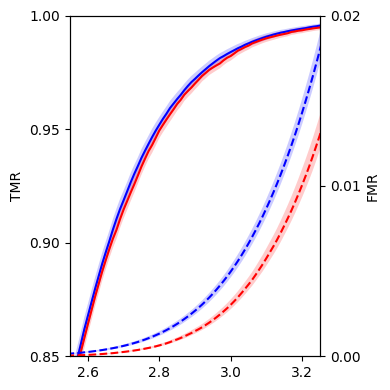

gaitpart Ph 1.0 Ps 0.0 Pc 1.0 far 0.01 thr 2.88 fmr 1.50 1.25 0.831 fnmr 0.50 0.44 0.877


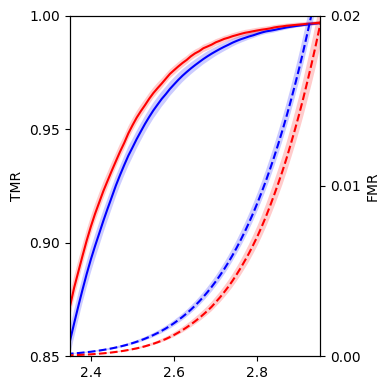

gaitgl Ph 1.0 Ps 0.0 Pc 1.0 far 0.01 thr 3.11 fmr 1.53 1.22 0.795 fnmr 0.49 0.50 1.031


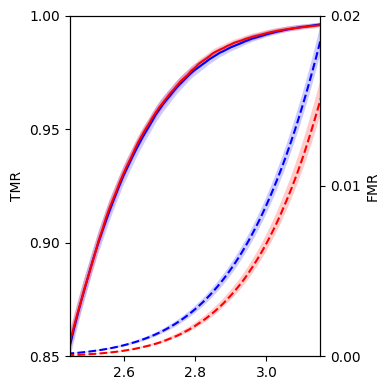

gaitset Ph 1.0 Ps 1.0 Pc 0.0 far 0.01 thr 3.25 fmr 1.92 0.86 0.450 fnmr 0.37 0.40 1.086


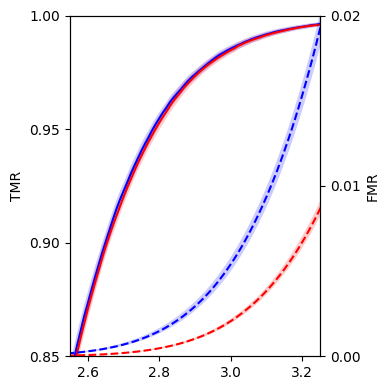

gaitpart Ph 1.0 Ps 1.0 Pc 0.0 far 0.01 thr 2.90 fmr 1.83 1.01 0.553 fnmr 0.38 0.29 0.779


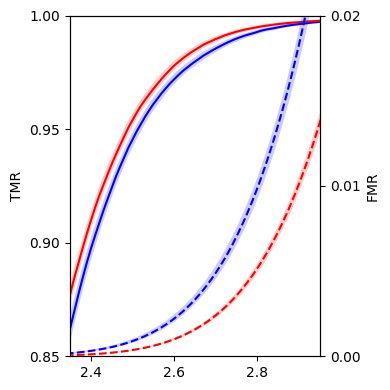

gaitgl Ph 1.0 Ps 1.0 Pc 0.0 far 0.01 thr 3.13 fmr 1.80 0.92 0.514 fnmr 0.37 0.35 0.947


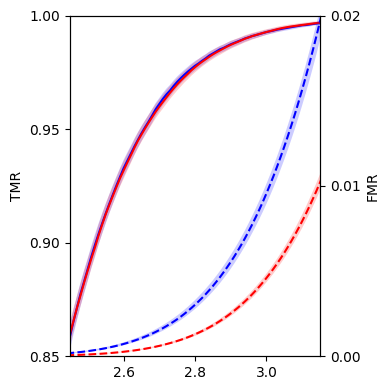

gaitset Ph 1.0 Ps 1.0 Pc 1.0 far 0.01 thr 3.21 fmr 1.63 1.14 0.701 fnmr 0.47 0.55 1.159


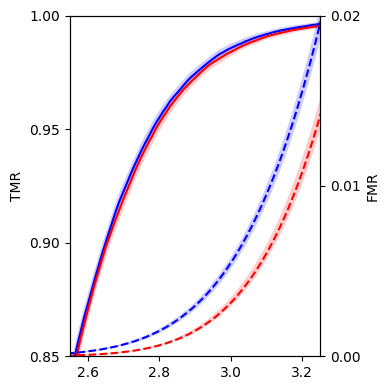

gaitpart Ph 1.0 Ps 1.0 Pc 1.0 far 0.01 thr 2.87 fmr 1.55 1.26 0.814 fnmr 0.46 0.35 0.755


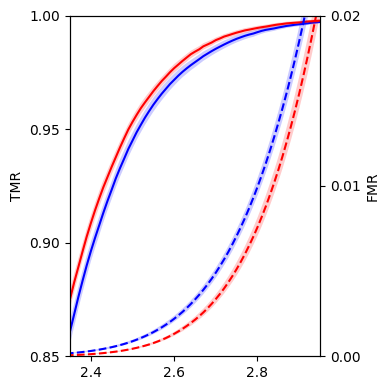

gaitgl Ph 1.0 Ps 1.0 Pc 1.0 far 0.01 thr 3.09 fmr 1.51 1.21 0.802 fnmr 0.46 0.45 0.991


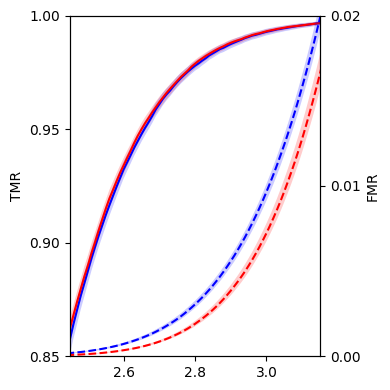

In [5]:
xranges = {'gaitset':[2.55,3.25], 'gaitpart':[2.35,2.95], 'gaitgl':[2.45,3.15]}

for _p_height in range(0, STEP_SIZE+1, STEP_SIZE):
    p_height = _p_height/STEP_SIZE
    for _p_frame in range(0, STEP_SIZE+1, STEP_SIZE):
        p_frame = _p_frame/STEP_SIZE
        for _p_dress in range(0, STEP_SIZE+1, STEP_SIZE):
            p_dress = _p_dress/STEP_SIZE

            #mean_fmr=1.0
            #mean_fnmr=1.0
            
            for alg in ['gaitset', 'gaitpart', 'gaitgl']:
                hists = np.zeros((5, bin_size_dist+1, REPEAT), dtype=np.float32)
                #tars = np.zeros((2, bin_size_dist+1, REPEAT), dtype=np.float32)
                #fars = np.zeros((2, bin_size_dist+1, REPEAT), dtype=np.float32)
                for r in range(REPEAT):
                    with open('1_dist_hist/{:03d}_{:03d}_{:03d}_{:03d}_{}.txt'.format(_p_height*100//STEP_SIZE, _p_frame*100//STEP_SIZE, _p_dress*100//STEP_SIZE, r, alg), 'r') as fp:
                        lines = fp.read().splitlines()
                    for i, line in enumerate(lines):
                        h = [int(x) for x in line.split()]
                        norm = sum(h)
                        h = [x/norm for x in h]
                        for j, x in enumerate(h):
                            hists[i,j,r] = x
                    #for i in range(1,bin_size_dist+1):
                    #    tars[0,i,r] = tars[0,i-1,r]+hists[0,i,r]
                    #    tars[1,i,r] = tars[1,i-1,r]+hists[1,i,r]
                    #    fars[0,i,r] = fars[0,i-1,r]+hists[2,i,r]
                    #    fars[1,i,r] = fars[1,i-1,r]+hists[3,i,r]

                tars = np.cumsum(hists[:2], axis=1)
                fars = np.cumsum(hists[2:4], axis=1)

                # plot for method
                print('{} Ph {:.1f} Ps {:.1f} Pc {:.1f}'.format(alg, p_height, p_frame, p_dress), end=' ')

                # print FAR ratio @ 0.01FAR
                thrs = []
                for far in [0.0001, 0.01]:
                    h = np.cumsum(np.mean(hists, axis=2), axis=1)
                    htmp = np.mean(h[2:], axis=0)
                    k=0
                    while htmp[k] < far:
                        k += 1
                    k-=1
                    thr = max_dist*k/bin_size_dist
                    thrs.append(thr)
                    if far == 0.01:
                        print('far {} thr {:.2f} fmr {:.2f} {:.2f} {:.3f} fnmr {:.2f} {:.2f} {:.3f}'.format(far, thr, 100*h[2,k], 100*h[3,k], h[3,k]/h[2,k], 100*(1-h[0,k]), 100*(1-h[1,k]), (1-h[1,k])/(1-h[0,k])))
                    #print(thr001, 'fmr', h[2,k], h[3,k], h[3,k]/h[2,k], 'fnmr', 1-h[0,k], 1-h[1,k], (1-h[1,k])/(1-h[0,k]))

                #mean_fmr *= h[3,k]/h[2,k]
                #mean_fnmr *= (1-h[1,k])/(1-h[0,k])

                # plot fars vs. tars
                fig, ax1 = plt.subplots(figsize=(4,4))
                ax2 = ax1.twinx()

                thr = [max_dist*x/bin_size_dist for x in range(bin_size_dist+1)]
                
                far_male = np.mean(fars[0], axis=1)
                far_female = np.mean(fars[1], axis=1)
                x_min=0
                x_max=max_dist
                for x, y in zip(thr, far_male):
                    if y < 0.0001:
                        x_min = max(x_min, x)
                    else:
                        break
                for x, y in zip(thr, far_female):
                    if y < 0.0001:
                        x_min = max(x_min, x)
                    else:
                        break
                for x, y in zip(thr, far_male):
                    if y > 0.01:
                        x_max = min(x_max, x)
                        break
                for x, y in zip(thr, far_female):
                    if y > 0.01:
                        x_max = min(x_max, x)
                        break

                ax1.fill_between(thr, np.percentile(tars[0], 2.5, axis=1), np.percentile(tars[0], 97.5, axis=1), alpha=0.2, facecolor='#0000ff')
                ax1.plot(thr, np.mean(tars[0], axis=1), '-', color='#0000ff', label='TAR male')
                ax2.fill_between(thr, np.percentile(fars[0], 2.5, axis=1), np.percentile(fars[0], 97.5, axis=1), alpha=0.2, facecolor='#0000ff')
                ax2.plot(thr, np.mean(fars[0], axis=1), '--', color='#0000ff', label='FAR male')

                ax1.fill_between(thr, np.percentile(tars[1], 2.5, axis=1), np.percentile(tars[1], 97.5, axis=1), alpha=0.2, facecolor='#ff0000')
                ax1.plot(thr, np.mean(tars[1], axis=1), '-', color='#ff0000', label='TAR female')
                ax2.fill_between(thr, np.percentile(fars[1], 2.5, axis=1), np.percentile(fars[1], 97.5, axis=1), alpha=0.2, facecolor='#ff0000')
                ax2.plot(thr, np.mean(fars[1], axis=1), '--', color='#ff0000', label='FAR female')

                ax1.set_ylim([0.85, 1])
                ax1.set_ylabel('TMR')
                ax2.set_ylim([0.00, 0.02])
                ax2.set_ylabel('FMR')
                #ax2.set_yscale("log")
                #plt.xlim([thrs[0],thrs[-1]])
                plt.xlim(xranges[alg])
                ax1.set_yticks([0.85,0.9,0.95,1.0])
                ax2.set_yticks([0,0.01,0.02])
                plt.xlabel("threshold")
                
                #fig.legend(loc='lower right')
                plt.tight_layout()
                plt.savefig('plots/tar_far_{:03d}_{:03d}_{:03d}_{}.png'.format(_p_height*100//STEP_SIZE, _p_frame*100//STEP_SIZE, _p_dress*100//STEP_SIZE, alg))
                plt.show()
                plt.close()                

                #break
            #mean_fmr = np.power(mean_fmr, 1.0/3.0)
            #mean_fnmr = np.power(mean_fnmr, 1.0/3.0)
            #print('Mean {:.3f} {:.3f}'.format(mean_fmr, mean_fnmr))
            #break
        #break
    #break


In [5]:
#diff = {}
X = {}
Y = {}
Z = {}
W = {}
for alg in ['gaitgl', 'gaitpart', 'gaitset']:
    #diff[alg] = np.zeros((STEP_SIZE+1,STEP_SIZE+1), dtype=np.float32)
    X[alg] = [[0]*(STEP_SIZE+1) for _ in range(STEP_SIZE+1)]
    Y[alg] = [[0]*(STEP_SIZE+1) for _ in range(STEP_SIZE+1)]
    Z[alg] = [[0]*(STEP_SIZE+1) for _ in range(STEP_SIZE+1)]
    W[alg] = [[0]*(STEP_SIZE+1) for _ in range(STEP_SIZE+1)]
for _p_height in range(0, STEP_SIZE+1):
    p_height = _p_height/STEP_SIZE
    #for _p_frame in range(0, STEP_SIZE+1):
    #    p_frame = _p_frame/STEP_SIZE
    if True:
        _p_frame = p_frame = 0
        for _p_dress in range(0, STEP_SIZE+1):
            p_dress = _p_dress/STEP_SIZE

            for alg in ['gaitgl', 'gaitpart', 'gaitset']:
                hists = np.zeros((5, bin_size_dist+1, REPEAT), dtype=np.float32)
                for r in range(REPEAT):
                    with open('1_dist_hist/{:03d}_{:03d}_{:03d}_{:03d}_{}.txt'.format(_p_height*100//STEP_SIZE, _p_frame*100//STEP_SIZE, _p_dress*100//STEP_SIZE, r, alg), 'r') as fp:
                        lines = fp.read().splitlines()
                    for i, line in enumerate(lines):
                        h = [int(x) for x in line.split()]
                        norm = sum(h)
                        h = [x/norm for x in h]
                        for j, x in enumerate(h):
                            hists[i,j,r] = x

                # print FAR ratio @ 0.01FAR
                fmrs = []
                fnmrs = []
                for far in [0.0001, 0.01]:
                    h = np.cumsum(np.mean(hists, axis=2), axis=1)
                    htmp = np.mean(h[2:], axis=0)
                    k=0
                    while htmp[k] < far:
                        k += 1
                    k-=1
                    
                    fmrs.append(h[3,k]/h[2,k])
                    fnmrs.append((1-h[1,k])/(1-h[0,k]))
                    
                    #thr = max_dist*k/bin_size_dist
                    #thrs.append(thr)
                    #if far == 0.01:
                    #    print('far {} thr {:.2f} fmr {:.2f} {:.2f} {:.3f} fnmr {:.2f} {:.2f} {:.3f}'.format(far, thr, 100*h[2,k], 100*h[3,k], h[3,k]/h[2,k], 100*(1-h[0,k]), 100*(1-h[1,k]), (1-h[1,k])/(1-h[0,k])))
                    #print(thr001, 'fmr', h[2,k], h[3,k], h[3,k]/h[2,k], 'fnmr', 1-h[0,k], 1-h[1,k], (1-h[1,k])/(1-h[0,k]))


                # print FAR ratio @ 0.001FAR
                #h = np.cumsum(np.mean(hists, axis=2), axis=1)
                #htmp = np.mean(h[2:], axis=0)
                #k=0
                #while htmp[k] < 0.001:
                #    k += 1
                #k-=1
                #thr001 = max_dist*k/bin_size_dist
                #print('thr {:.2f} fmr {:.2f} {:.2f} {:.3f} fnmr {:.2f} {:.2f} {:.3f}'.format(thr001, 100*h[2,k], 100*h[3,k], h[3,k]/h[2,k], 100*(1-h[0,k]), 100*(1-h[1,k]), (1-h[1,k])/(1-h[0,k])))
                
                fmr = fmrs[-1]
                fnmr = fnmrs[0]

                #diff[alg][_p_dress,_p_height] = np.log10(fmr)
                X[alg][_p_dress][_p_height] = p_dress
                Y[alg][_p_dress][_p_height] = p_height
                Z[alg][_p_dress][_p_height] = np.log2(fmr)
                W[alg][_p_dress][_p_height] = np.log2(fnmr)

gaitgl


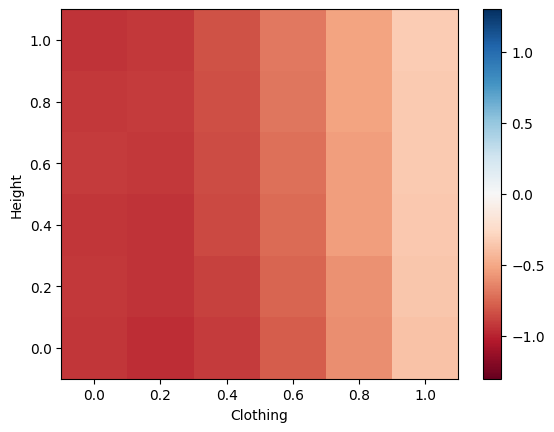

gaitpart


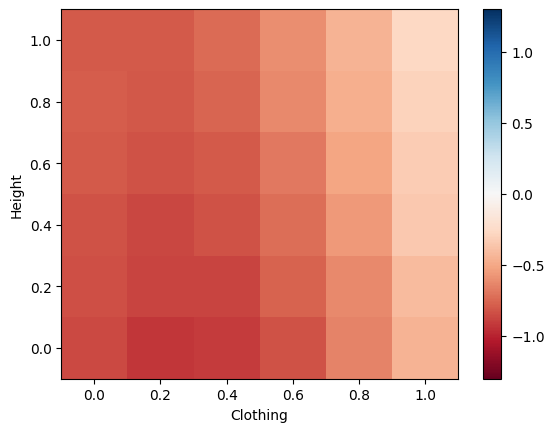

gaitset


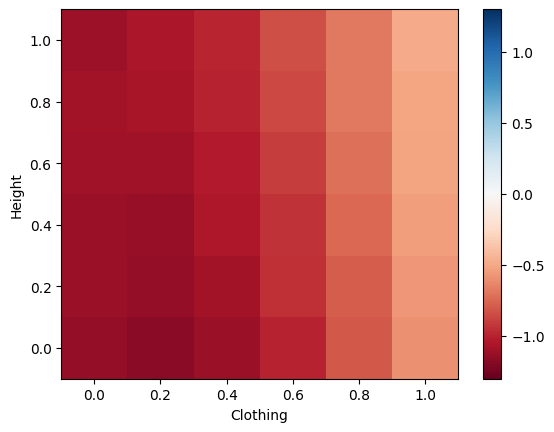

average


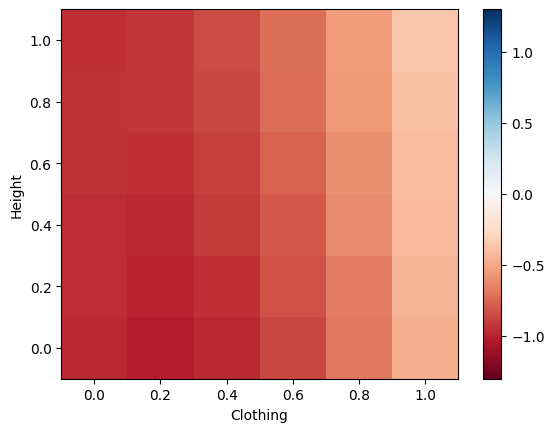

In [13]:
for alg in ['gaitgl', 'gaitpart', 'gaitset']:
    print(alg)
    #print(diff[alg])
    
    fig, ax = plt.subplots()
    
    c = ax.pcolormesh(X[alg], Y[alg], Z[alg], cmap='RdBu', vmin=-1.3, vmax=1.3)
    #ax.set_title('pcolormesh')
    # set the limits of the plot to the limits of the data
    #ax.axis([x.min(), x.max(), y.min(), y.max()])
    fig.colorbar(c, ax=ax)
    
    plt.xlabel("Clothing")
    plt.ylabel("Height")
    plt.savefig('plots/fmr_multi_c_h_{}.png'.format(alg))
    plt.show()

print('average')
fig, ax = plt.subplots()
c = ax.pcolormesh(X['gaitgl'], Y['gaitgl'], np.mean(np.stack(Z.values(), axis=0), axis=0), cmap='RdBu', vmin=-1.3, vmax=1.3)
fig.colorbar(c, ax=ax)
plt.xlabel("Clothing")
plt.ylabel("Height")
plt.savefig('plots/fmr_multi_c_h.png')
plt.show()

gaitgl


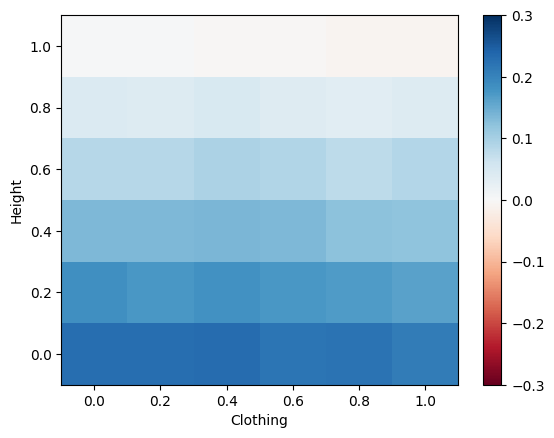

gaitpart


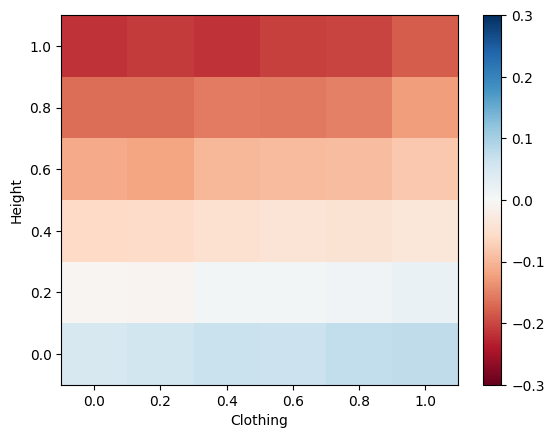

gaitset


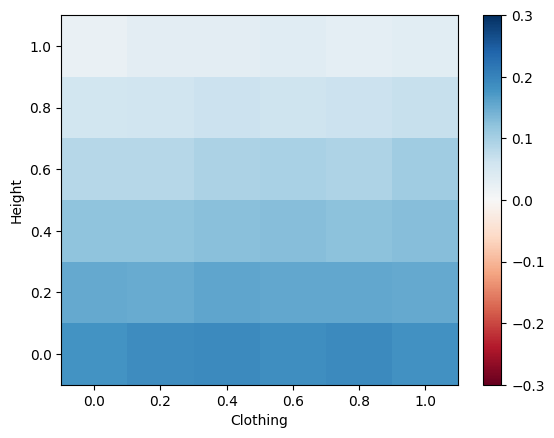

average


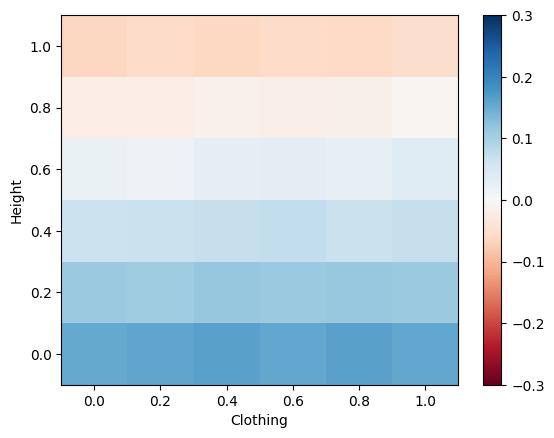

In [15]:
for alg in ['gaitgl', 'gaitpart', 'gaitset']:
    print(alg)
    #print(diff[alg])
    
    fig, ax = plt.subplots()
    
    c = ax.pcolormesh(X[alg], Y[alg], W[alg], cmap='RdBu', vmin=-0.3, vmax=0.3)
    #ax.set_title('pcolormesh')
    # set the limits of the plot to the limits of the data
    #ax.axis([x.min(), x.max(), y.min(), y.max()])
    fig.colorbar(c, ax=ax)
    
    plt.xlabel("Clothing")
    plt.ylabel("Height")
    plt.savefig('plots/fnmr_multi_c_h_{}.png'.format(alg))
    plt.show()

print('average')
fig, ax = plt.subplots()
c = ax.pcolormesh(X['gaitgl'], Y['gaitgl'], np.mean(np.stack(W.values(), axis=0), axis=0), cmap='RdBu', vmin=-0.3, vmax=0.3)
fig.colorbar(c, ax=ax)
plt.xlabel("Clothing")
plt.ylabel("Height")
plt.savefig('plots/fnmr_multi_c_h.png')
plt.show()

gaitgl


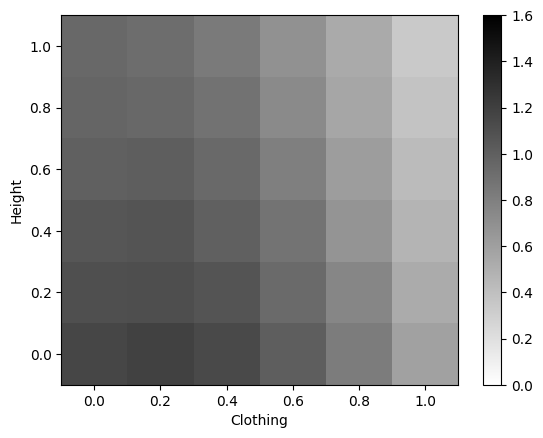

35
gaitpart


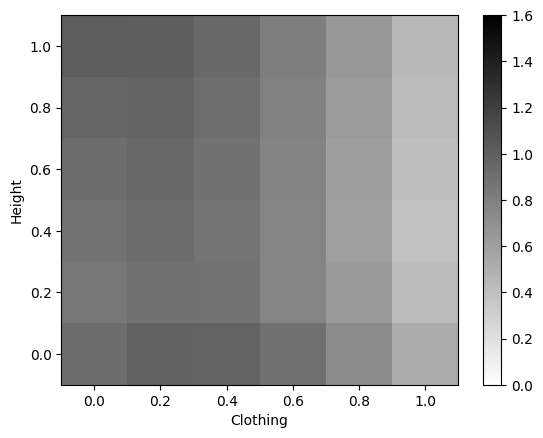

32
gaitset


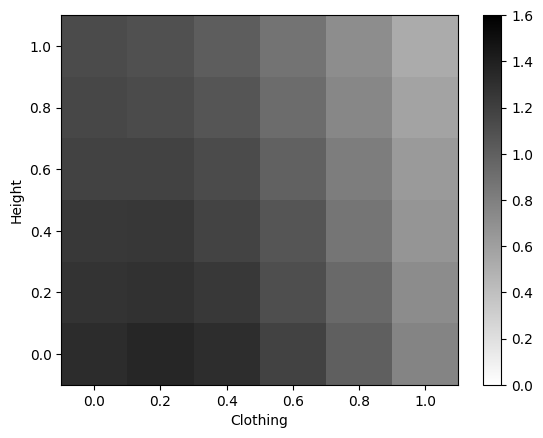

35
average


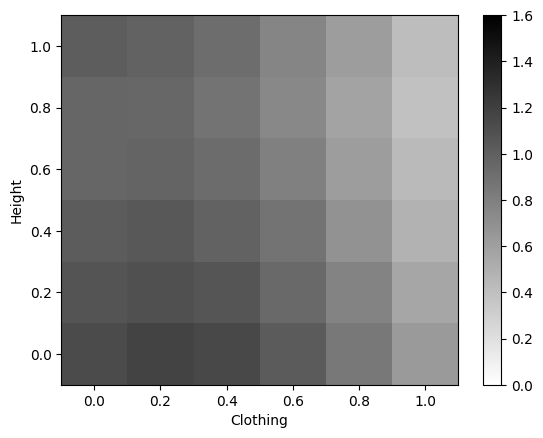

In [9]:
for alg in ['gaitgl', 'gaitpart', 'gaitset']:
    print(alg)
    #print(diff[alg])
    
    fig, ax = plt.subplots()
    
    c = ax.pcolormesh(X[alg], Y[alg], np.absolute(W[alg]) + np.absolute(Z[alg]), cmap='gist_yarg', vmin=0, vmax=1.6)
    #ax.set_title('pcolormesh')
    # set the limits of the plot to the limits of the data
    #ax.axis([x.min(), x.max(), y.min(), y.max()])
    fig.colorbar(c, ax=ax)
    
    plt.xlabel("Clothing")
    plt.ylabel("Height")
    plt.savefig('plots/all_multi_c_h_{}.png'.format(alg))
    plt.show()

print('average')
fig, ax = plt.subplots()
c = ax.pcolormesh(X['gaitgl'], Y['gaitgl'], np.absolute(np.mean(np.stack(W.values(), axis=0), axis=0)) + np.absolute(np.mean(np.stack(Z.values(), axis=0), axis=0)), cmap='gist_yarg', vmin=0, vmax=1.6)
fig.colorbar(c, ax=ax)
plt.xlabel("Clothing")
plt.ylabel("Height")
plt.savefig('plots/all_multi_c_h.png')
plt.show()